In [1]:
import numpy as np
from tensorflow.keras.models import Sequential # 순차적 모델을 생성하기 위한 모듈
from tensorflow.keras.layers import Dense # 밀집층(fully connected layer)을 추가하기 위한 모듈
from sklearn.model_selection import train_test_split # 데이터를 학습/테스트 세트로 나누기 위한 모듈
from sklearn.datasets import make_classification # 예제 데이터셋 생성 모듈

In [2]:
X, y = make_classification(
    n_samples=1000,     # 데이터 샘플 수
    n_features=20,      # 특징(특성) 수
    n_classes=2,        # 클래스 수 (이진 분류)
    random_state=42     # 랜덤 시드 고정 (결과 재현 가능성 보장)
)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)), # 첫 번째 은닉층
    Dense(8, activation='relu'),    # 두 번째 은닉층
    Dense(1, activation='sigmoid')  # 출력층 (이진 분류에서 사용)
])

c:\skproject\tensor_project\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer='adam', # 학습 속도를 조정하며 손실 함수의 최솟값을 찾습니다.
    loss='binary_crossentropy', # 이진 분류에서 자주 사용되는 손실 함수
    metrics=['accuracy'] # 학습 성과를 평가할 지표
)

In [6]:
history = model.fit(
    X_train, y_train,       # 학습용 데이터와 레이블
    validation_split=0.2,   # 검증 데이터 비율 (학습 데이터의 20%)
    epochs=20,              # 학습 반복 횟수
    batch_size=32,          # 한 번의 학습에서 사용하는 데이터 샘플 수
    verbose=1               # 학습 진행 상태를 출력
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5129 - loss: 0.7586 - val_accuracy: 0.5500 - val_loss: 0.7129
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5472 - loss: 0.7007 - val_accuracy: 0.5813 - val_loss: 0.6723
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5486 - loss: 0.6798 - val_accuracy: 0.6000 - val_loss: 0.6400
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6336 - loss: 0.6331 - val_accuracy: 0.6500 - val_loss: 0.6079
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7095 - loss: 0.5824 - val_accuracy: 0.7375 - val_loss: 0.5749
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6983 - loss: 0.5674 - val_accuracy: 0.7688 - val_loss: 0.5360
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7259 - loss: 0.5398 - val_accuracy: 0.7937 - val_loss: 0.4972
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8134 - loss: 0.4709 - val_accuracy: 0.8313 - val_loss:

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"테스트 손실: {test_loss:.4f}, 테스트 정확도: {test_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8471 - loss: 0.4064 
테스트 손실: 0.3854, 테스트 정확도: 0.8550


In [8]:
predictions = model.predict(X_test[:5]) # 테스트 데이터 중 5개의 샘플 예측
print("예측 결과:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
예측 결과: [[0.5084052 ]
 [0.51954603]
 [0.27989036]
 [0.72425854]
 [0.88935924]]


In [9]:
#이진 분류 

In [10]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [11]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, 
                           n_features=20, 
                           n_informative=15, 
                           n_redundant=5, 
                           random_state=42)

In [12]:
# 70 : 15 : 15
X_train, X_temp, y_train, y_temp = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, 
                                                y_temp,
                                                test_size=0.5, 
                                                random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # 입력층
    tf.keras.layers.Dense(64, activation='relu'), # 첫 번째 은닉층

    tf.keras.layers.Dropout(0.5), # 과적합 방지를 위한
    
    tf.keras.layers.Dense(32, activation='relu'), # 두 번째 은닉층
    tf.keras.layers.Dense(1, activation='sigmoid') # 출력층 (Sigmoid 활성화 함수)
])

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# 과적합방지
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5, 
                                                  restore_best_weights=True)

In [17]:
history = model.fit(X_train, 
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    #callbacks=[early_stopping]
                    )

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4734 - loss: 0.7392 - val_accuracy: 0.7267 - val_loss: 0.6071
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6545 - loss: 0.6251 - val_accuracy: 0.8000 - val_loss: 0.5300
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7310 - loss: 0.5516 - val_accuracy: 0.8467 - val_loss: 0.4733
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7610 - loss: 0.5072 - val_accuracy: 0.8667 - val_loss: 0.4254
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8118 - loss: 0.4455 - val_accuracy: 0.8533 - val_loss: 0.3800
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8183 - loss: 0.3991 - val_accuracy: 0.8733 - val_loss: 0.3407
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8097 - loss: 0.4318 - val_accuracy: 0.8733 - val_loss: 0.3150
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8329 - loss: 0.3923 - val_accuracy: 0.8867 - val_loss:

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9366 - loss: 0.1541 
Test Loss: 0.1304, Test Accuracy: 0.9467


In [19]:
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [20]:
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        79
           1       0.94      0.94      0.94        71

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [21]:
pip install matplotlib

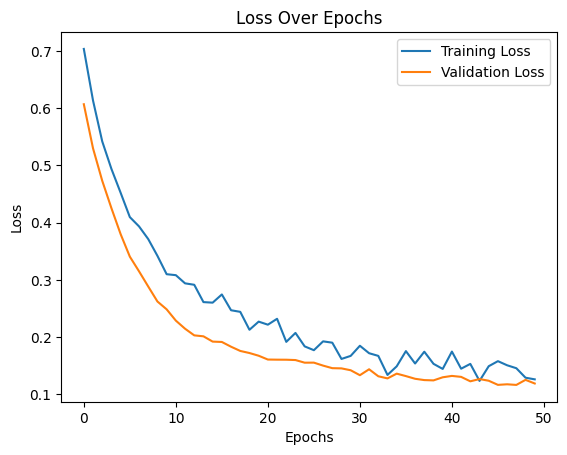

In [22]:
import matplotlib.pyplot as plt
# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

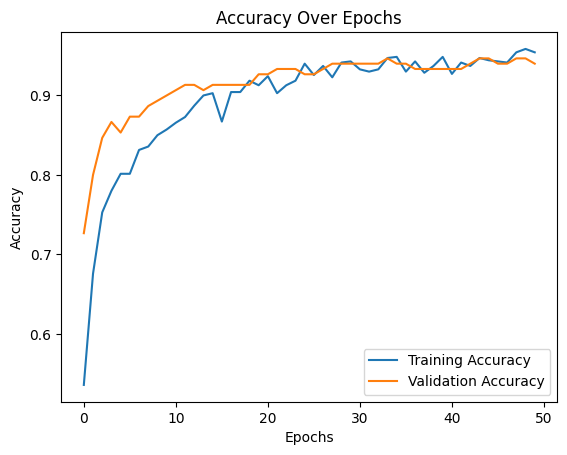

In [23]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()